
# Project: Investigate a Movie Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data set analyzed in this notebook is the TMDB Movies Database. This data set originiated from Kaggle and provided by Udacity. There is information on more than 5000 movies. The information used below is popularity, revenue, bugdet, and runtime. The information chosen from the data set is to dive into what metrics are good for figuring out how to measure a movies' success. 

 


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [21]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('../tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [22]:
df.shape

(10866, 21)

In [23]:
#This allows us to look inside of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [24]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000
mean,66064.177,0.646,14625701.094,39823319.793,102.071,217.390,5.975,2001.323,17551039.823,51364363.253
std,92130.137,1.000,30913213.831,117003486.582,31.381,575.619,0.935,12.813,34306155.723,144632485.040
min,5.000,0.000,0.000,0.000,0.000,10.000,1.500,1960.000,0.000,0.000
25%,10596.250,0.208,0.000,0.000,90.000,17.000,5.400,1995.000,0.000,0.000
50%,20669.000,0.384,0.000,0.000,99.000,38.000,6.000,2006.000,0.000,0.000
75%,75610.000,0.714,15000000.000,24000000.000,111.000,145.750,6.600,2011.000,20853251.084,33697095.717
max,417859.000,32.986,425000000.000,2781505847.000,900.000,9767.000,9.200,2015.000,425000000.000,2827123750.412


In [25]:
df.drop(['imdb_id','homepage','tagline','keywords','overview','production_companies','release_date'],axis=1,inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.500,2015,137999939.280,1392445892.524
1,76341,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.100,2015,137999939.280,348161292.489
2,262500,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.300,2015,101199955.472,271619025.408
3,140607,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.500,2015,183999919.040,1902723129.802
4,168259,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.300,2015,174799923.088,1385748801.471


In [26]:
sum(df.duplicated())

1

In [27]:
df.drop_duplicates(inplace=True)
print(sum(df.duplicated()))
print(df.shape)

0
(10865, 14)


In [28]:
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [29]:
df[df.isnull().any(axis=1)].sort_values(['runtime'],ascending=True)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2370,127717,0.082,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,12,5.800,2010,0.000,0.000
2315,48373,0.172,0,0,Listen to Your Heart,Alexia Rasmussen|Kent Moran|Cybill Shepherd|Sh...,NaN,0,Drama|Music|Romance,29,7.300,2010,0.000,0.000
1241,296370,0.135,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,18,5.700,2014,0.000,0.000
4883,142563,0.078,0,0,Fresh Guacamole,NaN,PES,2,Animation,29,7.900,2012,0.000,0.000
4890,126909,0.083,0,0,Cousin Ben Troop Screening,Jason Schwartzman,Wes Anderson,2,NaN,14,7.000,2012,0.000,0.000
7905,13924,0.647,0,0,The Adventures of AndrÃ© and Wally B.,NaN,Alvy Ray Smith,2,Animation,32,5.300,1984,0.000,0.000
10754,3171,0.003,0,0,Bambi Meets Godzilla,NaN,Marv Newland,2,Animation|Comedy,12,5.600,1969,0.000,0.000
10550,13925,0.306,0,0,Luxo Jr.,NaN,John Lasseter,2,Animation|Family,81,7.300,1986,0.000,0.000
5934,200204,0.067,0,0,Prada: Candy,Peter Gadiot|Rodolphe Pauly|LÃ©a Seydoux,Wes Anderson|Roman Coppola,3,NaN,27,6.900,2013,0.000,0.000
6930,53215,0.076,0,0,Kiwi!,NaN,Dony Permedi,3,Animation|Action,15,6.700,2006,0.000,0.000


In [30]:
df.dropna(inplace=True)
print(df.isnull().sum().any())
print(df.info())

False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB
None


In [31]:
df[['original_title','popularity','vote_count','vote_average']].sort_values('popularity',ascending=False).head(25)

,original_title,popularity,vote_count,vote_average
0,Jurassic World,32.986,5562,6.500
1,Mad Max: Fury Road,28.420,6185,7.100
629,Interstellar,24.949,6498,8.000
630,Guardians of the Galaxy,14.311,5612,7.900
2,Insurgent,13.113,2480,6.300
631,Captain America: The Winter Soldier,12.971,3848,7.600
1329,Star Wars,12.038,4428,7.900
632,John Wick,11.423,2712,7.000
3,Star Wars: The Force Awakens,11.173,5292,7.500
633,The Hunger Games: Mockingjay - Part 1,10.739,3590,6.600


In [32]:
df[['original_title','popularity','vote_count','vote_average']].sort_values('popularity',ascending=False).tail()

,original_title,popularity,vote_count,vote_average
7268,Born into Brothels,0.001,23,6.400
6961,Khosla Ka Ghosla!,0.001,10,6.800
6551,Mon petit doigt m'a dit...,0.001,13,5.700
6080,G.B.F.,0.001,82,6.100
9977,The Hospital,0.000,10,6.400


In [34]:
df['profit']=df['revenue']-df['budget']
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.500,2015,137999939.280,1392445892.524,1363528810
1,76341,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.100,2015,137999939.280,348161292.489,228436354
2,262500,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.300,2015,101199955.472,271619025.408,185238201
3,140607,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.500,2015,183999919.040,1902723129.802,1868178225
4,168259,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.300,2015,174799923.088,1385748801.471,1316249360


In [35]:
df.loc[df['profit']<0,'profit']=0

In [36]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
profit            0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
profit            10731 non-null int64
dtypes: float64(4), int64(7), object(4)
memory usage: 1.3+ MB


In [38]:
df['genres'].str.contains('|')
df['genres'].nunique()

2022

In [39]:
df_split_genre=df.copy()
split_genre=df_split_genre['genres'].str.split('|').apply(pd.Series,1).stack().reset_index(level=1,drop=True)
split_genre.name='genre_split'
df_split_genre=df_split_genre.drop(['genres'],axis=1).join(split_genre)

In [40]:
df_split_genre['genre_split'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [41]:
df_split_genre.isnull().sum()


id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
profit            0
genre_split       0
dtype: int64

In [42]:
df_split_cast=df.copy()


In [43]:
split_cast=df_split_cast['cast'].str.split('|').apply(pd.Series,1).stack().reset_index(level=1,drop=True)
split_cast.name='cast_split'
df_split_cast=df_split_cast.drop(['cast'],axis=1).join(split_cast)

In [44]:
df_split_genre.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,genre_split
0,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.500,2015,137999939.280,1392445892.524,1363528810,Action
0,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.500,2015,137999939.280,1392445892.524,1363528810,Adventure
0,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.500,2015,137999939.280,1392445892.524,1363528810,Science Fiction
0,135397,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.500,2015,137999939.280,1392445892.524,1363528810,Thriller
1,76341,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,6185,7.100,2015,137999939.280,348161292.489,228436354,Action


In [45]:
df_split_cast.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,cast_split
0,135397,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.500,2015,137999939.280,1392445892.524,1363528810,Chris Pratt
0,135397,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.500,2015,137999939.280,1392445892.524,1363528810,Bryce Dallas Howard
0,135397,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.500,2015,137999939.280,1392445892.524,1363528810,Irrfan Khan
0,135397,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.500,2015,137999939.280,1392445892.524,1363528810,Vincent D'Onofrio
0,135397,32.986,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.500,2015,137999939.280,1392445892.524,1363528810,Nick Robinson


In [46]:
df_split_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26753 entries, 0 to 10865
Data columns (total 15 columns):
id                26753 non-null int64
popularity        26753 non-null float64
budget            26753 non-null int64
revenue           26753 non-null int64
original_title    26753 non-null object
cast              26753 non-null object
director          26753 non-null object
runtime           26753 non-null int64
vote_count        26753 non-null int64
vote_average      26753 non-null float64
release_year      26753 non-null int64
budget_adj        26753 non-null float64
revenue_adj       26753 non-null float64
profit            26753 non-null int64
genre_split       26753 non-null object
dtypes: float64(4), int64(7), object(4)
memory usage: 3.3+ MB


In [47]:
df_split_cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52334 entries, 0 to 10865
Data columns (total 15 columns):
id                52334 non-null int64
popularity        52334 non-null float64
budget            52334 non-null int64
revenue           52334 non-null int64
original_title    52334 non-null object
director          52334 non-null object
runtime           52334 non-null int64
genres            52334 non-null object
vote_count        52334 non-null int64
vote_average      52334 non-null float64
release_year      52334 non-null int64
budget_adj        52334 non-null float64
revenue_adj       52334 non-null float64
profit            52334 non-null int64
cast_split        52334 non-null object
dtypes: float64(4), int64(7), object(4)
memory usage: 6.4+ MB


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
profit            10731 non-null int64
dtypes: float64(4), int64(7), object(4)
memory usage: 1.3+ MB


In [49]:
df.to_csv('tmbd-movies-clean.csv',index=False)
df_split_genre.to_csv('tmbd-movies-genre.csv',index=False)
df_split_cast.to_csv('tmbd-movies-cast.csv',index=False)

## Exploratory Data Analysis



### Research Question 1 

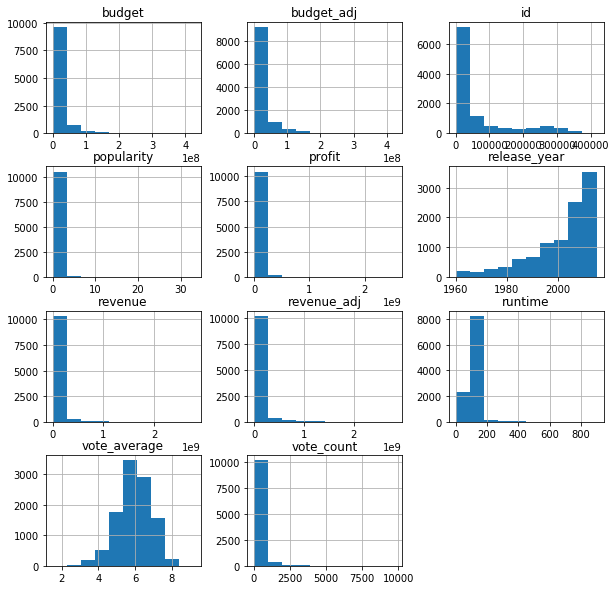

In [50]:
df.hist(figsize=(10,10));

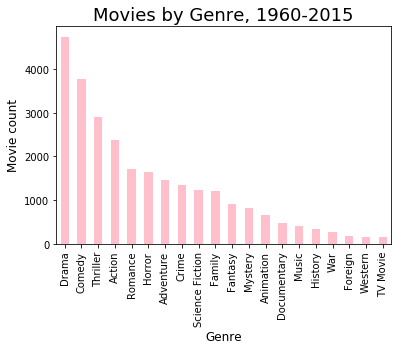

In [53]:
df_split_genre['genre_split'].value_counts().plot(kind='bar',color='pink');
plt.title('Movies by Genre, 1960-2015',size=18)
plt.xlabel('Genre',size=12)
plt.ylabel('Movie count',size=12);

In [56]:
cast_decades=df_split_cast.groupby(['decades'])['cast_split'].value_counts()
cast_decades.groupby(level=0).nlargest(3).reset_index(level=0,drop=True)

KeyError: 'decades'

### Research Question 2  (Is there an association between a movies' revenue and how popular it is?)

Below is a scatter plot between the variables popularity and revenue. THe plot on the left is in log scale and the plot of the right is the default values. The plot that is in log shows that the higher the revenue the more popular the movie was. There were cases that show movies with high revenue were not very popular, but the majority shows that if a movie had a medium revenue then it was popular. These varaibles are statisitcally significant, which we can tell by running them with a Pearson's R correlation test. 

### Research Question 3  (Is there a relationship between genre and gross profit?)

Below is a histogram of genre and gross profit. Which genre's did had the highest gross profit? Action, Adventure, Science Fiction,Family, Fantasy, and Animation. The gren's that did the worst are: Foreign, Documentary, Horror, and TV Movie. 

<a id='conclusions'></a>
## Conclusions


Overall, important information can be gathered when looking at the budet and revenue for the popularity of movies. The above plots, on average, show that with a decent budget a movie can be popular. There are a few outliers but for most part, looking at the groupings of each movie's budget showed that a movie needs a moderate budget to do well. 
A movie's revenue is also important to look at. Surprisingly, a small cohert of movies that did not have a high revenue return was still considered to be popular. For the most part though, revenue is a good indicator of how popular a movie is. 